In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
df_train.head(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING


In [5]:
df_test.shape

(2947, 563)

In [6]:
null_cnt = df_train.isnull().sum()
null_columns = null_cnt[null_cnt > 0]
print(null_columns)

Series([], dtype: int64)


In [7]:
null_cnt = df_test.isnull().sum()
null_columns = null_cnt[null_cnt > 0]
print(null_columns)

Series([], dtype: int64)


In [8]:
df_train.select_dtypes('object').columns.tolist()

['Activity']

<Axes: ylabel='count'>

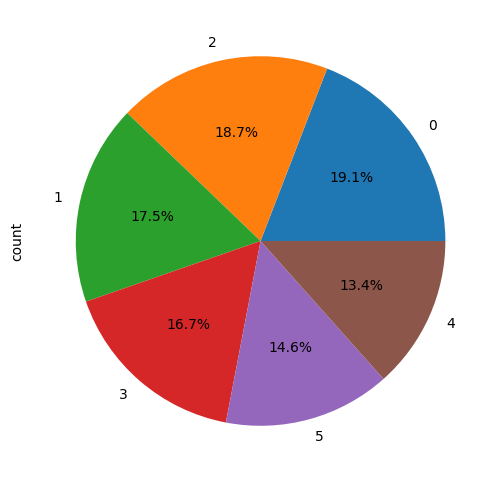

In [37]:
df_train['Activity'].value_counts().plot(kind='pie', autopct='%.1f%%', figsize=(6,6))

### Data Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df_train['Activity'] = le.fit_transform(df_train['Activity'])
df_test['Activity'] = le.transform(df_test['Activity'])

In [11]:
std = StandardScaler()
df_train.iloc[:,:-1] = std.fit_transform(df_train.iloc[:,:-1])
df_test.iloc[:,:-1] = std.transform(df_test.iloc[:,:-1])

/tmp/ipython-input-3825730695.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.8288513 -1.8288513 -1.8288513 ...  1.4025149  1.4025149  1.4025149]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.iloc[:,:-1] = std.fit_transform(df_train.iloc[:,:-1])
/tmp/ipython-input-3825730695.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.71742488 -1.71742488 -1.71742488 ...  0.73395638  0.73395638
  0.73395638]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.iloc[:,:-1] = std.transform(df_test.iloc[:,:-1])


In [12]:
df_train.head(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.276399,-0.360603,0.06294,-0.778427,-0.02608,-0.687219,0.407946,-0.007568,-1.828851,2


In [13]:
x_train = df_train.drop('Activity', axis=1)
y_train = df_train['Activity']

x_test = df_test.drop('Activity', axis=1)
y_test = df_test['Activity']

### Ready Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(n_estimators=125, random_state=42)
rfm.fit(x_train, y_train)

RandomForestClassifier(n_estimators=125, random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rfm.predict(x_test)
print("Original Feature Accuracy : \n", accuracy_score(y_test, y_pred))
print("\n\nClassification Report\n",classification_report(y_test, y_pred))

Original Feature Accuracy : 
 0.9297590770274856


Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.89      0.90       491
           2       0.90      0.92      0.91       532
           3       0.91      0.97      0.94       496
           4       0.96      0.85      0.90       420
           5       0.90      0.93      0.91       471

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



## XGBoost

In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
y_pred_xgb = xgb.predict(x_test)
print("Original Feature Accuracy : \n", accuracy_score(y_test, y_pred_xgb))
print("\n\nClassification Report\n",classification_report(y_test, y_pred_xgb))

Original Feature Accuracy : 
 0.9372242958941296


Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.93      0.85      0.88       491
           2       0.87      0.94      0.90       532
           3       0.93      0.98      0.95       496
           4       0.97      0.92      0.94       420
           5       0.93      0.93      0.93       471

    accuracy                           0.94      2947
   macro avg       0.94      0.94      0.94      2947
weighted avg       0.94      0.94      0.94      2947



### PCA

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [19]:
rfm_pca = RandomForestClassifier(n_estimators=125, random_state=42)
rfm_pca.fit(x_train_pca, y_train)

y_pred_pca = rfm_pca.predict(x_test_pca)
print("PCA Accuracy: : ",round(accuracy_score(y_test, y_pred_pca)*100, 2))
print("\n\nClassification Report\n",classification_report(y_test, y_pred_pca))

PCA Accuracy: :  87.34


Classification Report
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       537
           1       0.83      0.75      0.79       491
           2       0.79      0.90      0.85       532
           3       0.84      0.98      0.90       496
           4       0.94      0.72      0.81       420
           5       0.88      0.91      0.90       471

    accuracy                           0.87      2947
   macro avg       0.88      0.87      0.87      2947
weighted avg       0.88      0.87      0.87      2947



In [20]:
xgb_pca = XGBClassifier(random_state=42)
xgb_pca.fit(x_train_pca, y_train)

y_pred_pca_xgb = xgb_pca.predict(x_test_pca)
print("PCA Accuracy: : ", round(accuracy_score(y_test, y_pred_pca_xgb)*100, 2))
print("\n\nClassification Report\n",classification_report(y_test, y_pred_pca_xgb))

PCA Accuracy: :  90.26


Classification Report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       537
           1       0.86      0.81      0.83       491
           2       0.84      0.93      0.88       532
           3       0.88      0.98      0.93       496
           4       0.97      0.79      0.87       420
           5       0.91      0.94      0.93       471

    accuracy                           0.90      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.90      0.90      2947



## Select Best

k=20, Accuracy=0.8575
k=40, Accuracy=0.8755
k=60, Accuracy=0.8877
k=80, Accuracy=0.9141
k=100, Accuracy=0.9128
k=120, Accuracy=0.9315
k=150, Accuracy=0.9063
k=200, Accuracy=0.9087


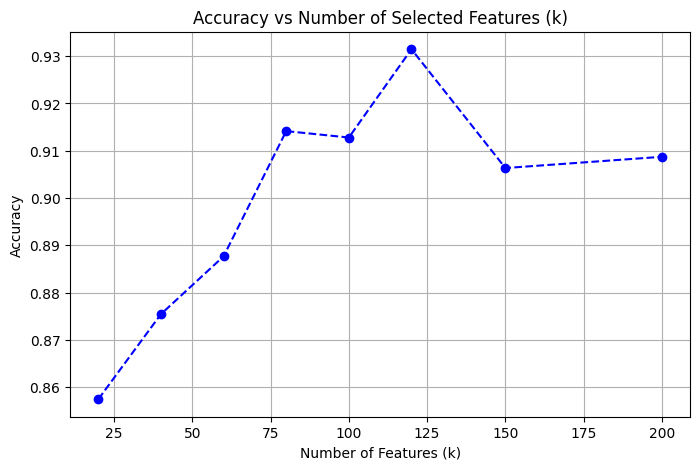

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

k_values = [20, 40, 60, 80, 100, 120, 150, 200]
accuracy = []

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    x_train_k = selector.fit_transform(x_train, y_train)
    x_test_k = selector.transform(x_test)

    model = XGBClassifier(random_state=42)
    model.fit(x_train_k, y_train)
    preds = model.predict(x_test_k)

    acc = accuracy_score(y_test, preds)
    accuracy.append(acc)

    print(f"k={k}, Accuracy={acc:.4f}")

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy, marker='o', linestyle='--', color='b')
plt.title("Accuracy vs Number of Selected Features (k)")
plt.xlabel("Number of Features (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


### HPO

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

pipeline = Pipeline([
    ('select', SelectKBest(score_func=f_classif, k=120)),
    ('xgb', XGBClassifier(random_state=42))
])


param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__gamma': [0, 0.1, 0.3]
}


grid = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

best_model = grid.best_estimator_
preds = best_model.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, preds))
print("\nClassification Report:\n", classification_report(y_test, preds))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'xgb__subsample': 0.8, 'xgb__n_estimators': 300, 'xgb__min_child_weight': 5, 'xgb__max_depth': 5, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0.3, 'xgb__colsample_bytree': 0.8}
Best Score: 0.894858686028471
Test Accuracy: 0.9324737020699015

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.87      0.91       491
           2       0.89      0.97      0.93       532
           3       0.90      0.94      0.92       496
           4       0.94      0.90      0.92       420
           5       0.91      0.90      0.91       471

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947



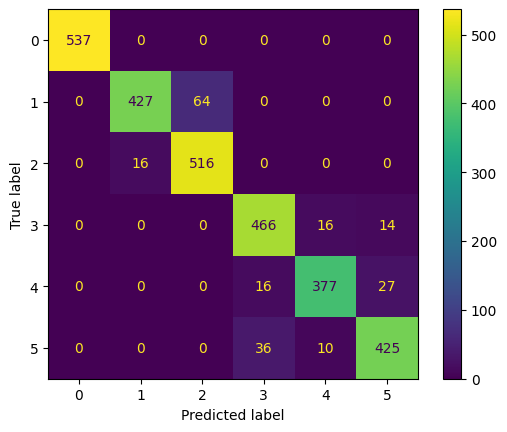

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot()

In [31]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, x_train, y_train, cv=3, scoring='accuracy')
print("CV Accuracy:", cv_scores.mean())

CV Accuracy: 0.894858686028471
